In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sampled_data.csv", sep=",")

X,y 분리 및 Train, test set 분리

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

스케일링

In [5]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train_s, y_train)
print(logreg.score(X_test_s, y_test))

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9998595505617978


Cut-off 찾기

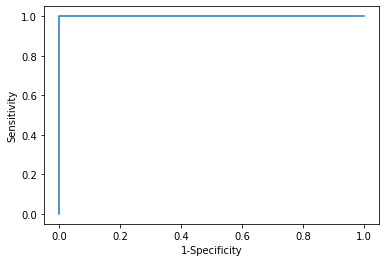

[[0.0, 1.9999995267516946], [0.1111111111111111, 0.9999995267516947], [0.8888888888888888, 0.7354998303273188], [0.888467007296989, 0.1867604348773627], [0.9995781184081002, 0.14783150186736668], [0.536633384896639, 0.0005026466897693181], [0.5363521305020391, 0.0005024705055815116], [0.0, 6.474754101179186e-08]]
0.14783150186736668


In [7]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_s)[:, 1])
x = fpr
y = tpr

plt.plot(x, y)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()
res = [[abs(fpr_i - tpr_i), thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
print(res)
d_point = 0
for i in res:
    if i[0] > d_point:
        d_point = i[0]
        cut_off = i[1]
print(cut_off)

confusion matrix

In [8]:
y_pred = logreg.predict_proba(X_test_s)[:,1:]
a = []
for i in y_pred:
    if i < cut_off:
        a.append(0)
    else:
        a.append(1)
        
conf_m = confusion_matrix(a, y_test)

print(conf_m)
a = conf_m[0][0] + conf_m[1][1]
sum = 0
for row in conf_m:
    for index in row:
       sum += index

print(a/sum)

[[7108    0]
 [   3    9]]
0.9995786516853933
